# American Time Use Survey Analysis

## Imports and Load Config File

In [6]:
import pandas as pd
import numpy as np
import yaml as yml
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Specify the path to the YAML file
config_yaml_file_path = 'config.atus.yml'

# Open and read the YAML file
with open(config_yaml_file_path, 'r') as file:
    config_yaml_data = yml.safe_load(file)

working_directory = config_yaml_data["Working_Directory"]
data_dir = config_yaml_data["Data_Directory"]
year = config_yaml_data["Year"]
dataset_type = config_yaml_data["Dataset_Type"]
dataset_dir = f"{data_dir}/{year}/atus{dataset_type}_{year}/atus{dataset_type}_{year}.dat"
print(f"Retreiving Dataset From: {dataset_dir}")

Retreiving Dataset From: /mnt/c/Users/hunte/Proton Drive/whbarndt/My files/Sharing-Is-Caring/Projects/ATUS/Datasets/2013/atusact_2013/atusact_2013.dat


## Load Data

In [7]:
# Load data
atus_df = pd.read_csv(dataset_dir)
atus_df

,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,...,TUDURSTOP,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
0,20130101130004,1,-1,0,0,0,-1,0,0,-1,...,2,-1,04:00:00,12:00:00,1,1,1,10101,101,0
1,20130101130004,2,1,5,5,0,-1,5,5,-1,...,1,-1,12:00:00,12:05:00,11,1,1,110101,1101,0
2,20130101130004,3,1,120,120,0,-1,120,120,-1,...,1,-1,12:05:00,14:05:00,12,3,3,120303,1203,0
3,20130101130004,4,1,0,0,0,-1,0,0,-1,...,2,-1,14:05:00,19:00:00,6,3,1,60301,603,0
4,20130101130004,5,1,30,30,0,-1,30,30,-1,...,1,-1,19:00:00,19:30:00,11,1,1,110101,1101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215571,20131212132488,22,1,0,0,0,-1,0,-1,0,...,1,-1,17:45:00,18:45:00,2,2,1,20201,202,0
215572,20131212132488,23,1,0,0,0,-1,0,-1,0,...,1,-1,18:45:00,19:30:00,11,1,1,110101,1101,0
215573,20131212132488,24,1,0,0,0,-1,0,-1,0,...,1,-1,19:30:00,21:30:00,12,3,3,120303,1203,0
215574,20131212132488,25,1,0,0,0,-1,0,-1,0,...,1,-1,21:30:00,21:35:00,3,1,1,30101,301,0


## Activity File

### Activity File Variable Information: "atusact_{year} files"
- TUCASEID - ATUS Case ID (14-digit identifier), respondent from household
- TUACTIVITY_N - Activity line number
- TEWHERE - Edited: where were you during the activity?
- TRTCCTOT_LN - Total time spent during activity providing secondary childcare for all children < 13 (in minutes)
- TRTCC_LN - Total time spent during activity providing secondary child care for
household and own nonhousehold children < 13 (in minutes)
- TRTCOC_LN - Total time spent during activity providing secondary child care for nonown,
nonhousehold children <13 (in minutes)
- TRTEC_LN - Time spent providing eldercare by activity (in minutes)
- TRTHH_LN - Total time spent during activity providing secondary childcare for
household children < 13 (in minutes)
- TRTNOHH_LN - Total time spent during activity providing secondary childcare for nonown
household children < 13 (in minutes)
- TRTOHH_LN - Total time spent during activity providing secondary childcare for own
household children < 13 (in minutes)
- TRTONHH_LN - Total time spent during activity providing secondary childcare for own
nonhousehold children < 13 (in minutes)
- TRTO_LN - Total time spent during activity providing secondary childcare for own
children < 13 (in minutes)
- TRWBELIG - Flag identifying activities eligible for the Well-being Module
- TUACTDUR - Duration of activity in minutes (last activity not truncated at 4:00 a.m.)
- TUACTDUR24 - Duration of activity in minutes (last activity truncated at 4:00 a.m.)
- TUCC5 - Was at least one of your own household children < 13 in your care during
this activity?
- TUCC5B - Was at least one of your non-own household children < 13 in your care
during this activity?
- TUCC7 - Was at least one of your own non-household children < 13 in your care
during this activity?
- TUCC8 - Other than household or own non-household children < 13, was there a
child 0-12 in your care during this activity?
- TUCUMDUR - Cumulative duration of activity lengths in minutes; last activity not
truncated at 4:00am or 1440 minutes (cumulative total of TUACTDUR for
each TUCASEID)
- TUCUMDUR24 - Cumulative duration of activity lengths in minutes; last activity truncated at
4:00am or 1440 minutes (cumulative total of TUACTDUR24 for each
TUCASEID)
- TUDURSTOP - Method for reporting activity duration
- TUEC24 - At which times or during which activities did you provide that care or
assistance yesterday?
- TUSTARTTIM - Activity Start Time
- TUSTOPTIME - Activity End Time
- TUTIER1CODE - Lexicon Tier 1: 1st and 2nd digits of 6-digit activity code
- TUTIER2CODE - Lexicon Tier 2: 3rd and 4th digits of 6-digit activity code
- TUTIER3CODE - Lexicon Tier 3: 5th and 6th digits of 6-digit activity code
- TRCODE - Six digit activity code
- TRTIER2 - First and second activity tiers
- TXWHERE - TEWHERE: allocation flag

### Convery Start and Stop Time To Datetime Format

In [8]:
# Convert time strings to datetime
base_date = f'{year}-01-01'
atus_df['TUSTARTTIM'] = pd.to_datetime(base_date + ' ' + atus_df['TUSTARTTIM'])
atus_df['TUSTOPTIME'] = pd.to_datetime(base_date + ' ' + atus_df['TUSTOPTIME'])

# Define Start time, Stop time, and Range array between the two
start_time = pd.to_datetime(f'{base_date}T04:00')
print(f"Start Time: {start_time}")
stop_time = start_time + pd.Timedelta(days=1)
print(f"Stop Time: {stop_time}")
atus_time_range = np.arange(start_time, stop_time, dtype='datetime64[m]')

# Adjust dates for times past midnight
atus_df.loc[atus_df['TUSTARTTIM'].dt.time < start_time.time(), 'TUSTARTTIM'] += pd.Timedelta(days=1)
atus_df.loc[atus_df['TUSTARTTIM'] > atus_df['TUSTOPTIME'], 'TUSTOPTIME'] += pd.Timedelta(days=1)

atus_df

Start Time: 2013-01-01 04:00:00
Stop Time: 2013-01-02 04:00:00


,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,...,TUDURSTOP,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
0,20130101130004,1,-1,0,0,0,-1,0,0,-1,...,2,-1,2013-01-01 04:00:00,2013-01-01 12:00:00,1,1,1,10101,101,0
1,20130101130004,2,1,5,5,0,-1,5,5,-1,...,1,-1,2013-01-01 12:00:00,2013-01-01 12:05:00,11,1,1,110101,1101,0
2,20130101130004,3,1,120,120,0,-1,120,120,-1,...,1,-1,2013-01-01 12:05:00,2013-01-01 14:05:00,12,3,3,120303,1203,0
3,20130101130004,4,1,0,0,0,-1,0,0,-1,...,2,-1,2013-01-01 14:05:00,2013-01-01 19:00:00,6,3,1,60301,603,0
4,20130101130004,5,1,30,30,0,-1,30,30,-1,...,1,-1,2013-01-01 19:00:00,2013-01-01 19:30:00,11,1,1,110101,1101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215571,20131212132488,22,1,0,0,0,-1,0,-1,0,...,1,-1,2013-01-01 17:45:00,2013-01-01 18:45:00,2,2,1,20201,202,0
215572,20131212132488,23,1,0,0,0,-1,0,-1,0,...,1,-1,2013-01-01 18:45:00,2013-01-01 19:30:00,11,1,1,110101,1101,0
215573,20131212132488,24,1,0,0,0,-1,0,-1,0,...,1,-1,2013-01-01 19:30:00,2013-01-01 21:30:00,12,3,3,120303,1203,0
215574,20131212132488,25,1,0,0,0,-1,0,-1,0,...,1,-1,2013-01-01 21:30:00,2013-01-01 21:35:00,3,1,1,30101,301,0


### Create Total Persons by Activity Dataframe

In [9]:
# Specify the path to the YAML file
activity_yaml_file_path = f'activity.{year}.atus.yml'

# Open and read the YAML file
with open(activity_yaml_file_path, 'r') as file:
    all_tier_codes = yml.safe_load(file)

# Define all unique codes of selected tier
selected_tier = 'TUTIER1CODE'
all_selected_tier_activity_codes = atus_df[selected_tier].unique()
print(all_selected_tier_activity_codes)

# Tier 1 Codes
tier_1_codes = {
    1: 'Personal Care',
    2: 'Household Activities',
    3: 'Caring For & Helping Household (HH) Members',
    4: 'Caring For & Helping Nonhousehold (NonHH) Members',
    5: 'Work & Work-Related Activities',
    6: 'Education',
    7: 'Consumer Purchases',
    8: 'Professional & Personal Care Services',
    9: 'Household Services',
    10: 'Government Services & Civic Obligations',
    11: 'Eating and Drinking',
    12: 'Socializing, Relaxing, and Leisure',
    13: 'Sports, Exercise, and Recreation',
    14: 'Religious and Spiritual Activities',
    15: 'Volunteer Activities',
    16: 'Telephone Calls',
    18: 'Traveling',
    50: 'Data Codes'
}

# Dictionary where totals will be stored
total_persons_by_activity = {'Time': atus_time_range}
specific_activities_df = atus_df[atus_df[selected_tier].isin(all_selected_tier_activity_codes)]

# Looping through each activity 
for activity in all_selected_tier_activity_codes:
    
    # Filter the DataFrame for the current activity
    activity_df = specific_activities_df[specific_activities_df[selected_tier] == activity]
    
    # Create a mask for each row indicating where it falls in the time range
    mask = (total_persons_by_activity['Time'] >= activity_df['TUSTARTTIM'].values[:, None]) & \
           (total_persons_by_activity['Time'] < activity_df['TUSTOPTIME'].values[:, None])

    # Sum across the mask to get the count for each minute
    total_persons_by_activity[f'{tier_1_codes[activity]}'] = mask.sum(axis=0)

total_persons_by_activity_df = pd.DataFrame(total_persons_by_activity)
total_persons_by_activity_df

ScannerError: mapping values are not allowed here
  in "activity.2013.atus.yml", line 2, column 7

In [ ]:
print(all_tier_codes)

NameError: name 'all_tier_codes' is not defined

## Visualize Data

### Sleeping, Eating, and Recreation - Minute-by-minute

"\nstack_plt_x = total_persons_by_activity_df['Time'].values\nprint(stack_plt_x)\nstack_plt_y = total_persons_by_activity_df.drop(columns=['Time']).T\nstats_plt_y_labels = total_persons_by_activity_df.drop(columns=['Time']).columns.to_list()\nprint(stack_plt_y)\nstack_plt = ax.stackplot(stack_plt_x, stack_plt_y)"

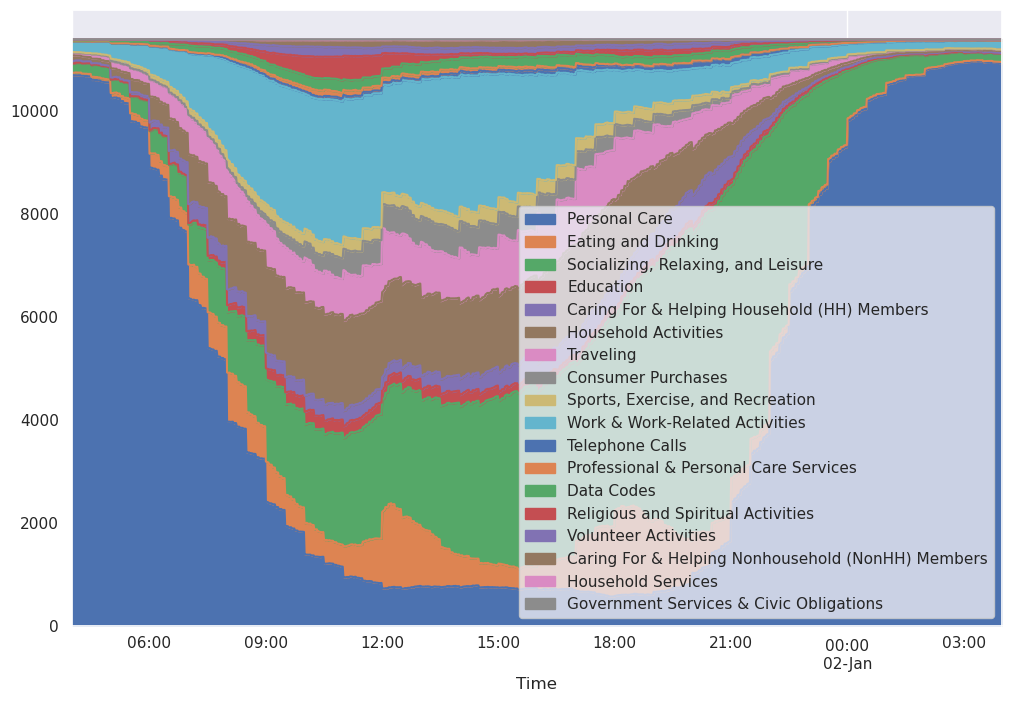

In [ ]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(figsize=[12, 8])
total_persons_by_activity_df = total_persons_by_activity_df.set_index('Time')
total_persons_by_activity_df.plot.area(ax=ax)